# Building a Classification Decision Tree with [R] --in progress--

This is an introduction to Decision Trees using the [R] language. Using the iris dataset we'll build a tree to identify, based on the width and length of Sepal and Pedal, the Species of the flower.

For this purpose we'll use the [`caret`](http://topepo.github.io/caret/index.html) library, from which we'll load up the [`rpart`](https://cran.r-project.org/web/packages/rpart/index.html) module for *Recursive partitioning for classification and survival trees*.

We'll also need the [`rattle`](https://cran.r-project.org/web/packages/rattle/index.html) package to do some fancy plots for evaluating the model.

**Let's start!**

In [1]:
library(datasets)
library(caret)
library(rattle)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: RGtk2
Rattle: A free graphical interface for data mining with R.
Version 3.5.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


---
### 1. Get the dataset

In [2]:
indata <- datasets::iris

In [3]:
head(indata)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa



---


### 2. Explore the dataset

Make pair plots and density plots to find the relations of your data..
One can simply do the pairs plot of the base system:


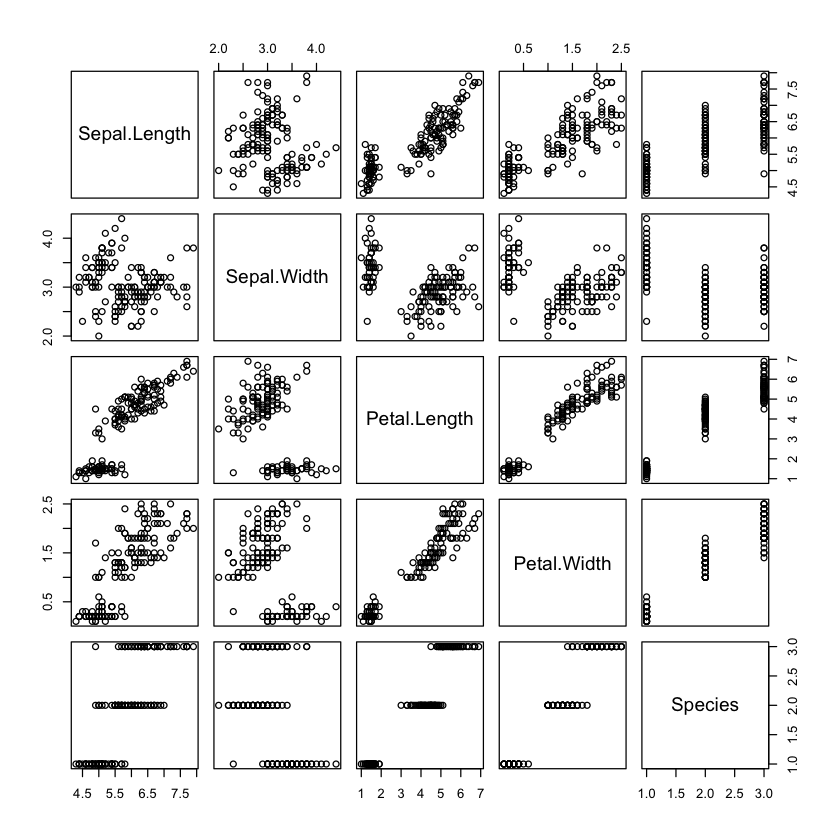

In [5]:
pairs(~. , data=indata)

or make it a bit more pretty with featurePlot (caret)

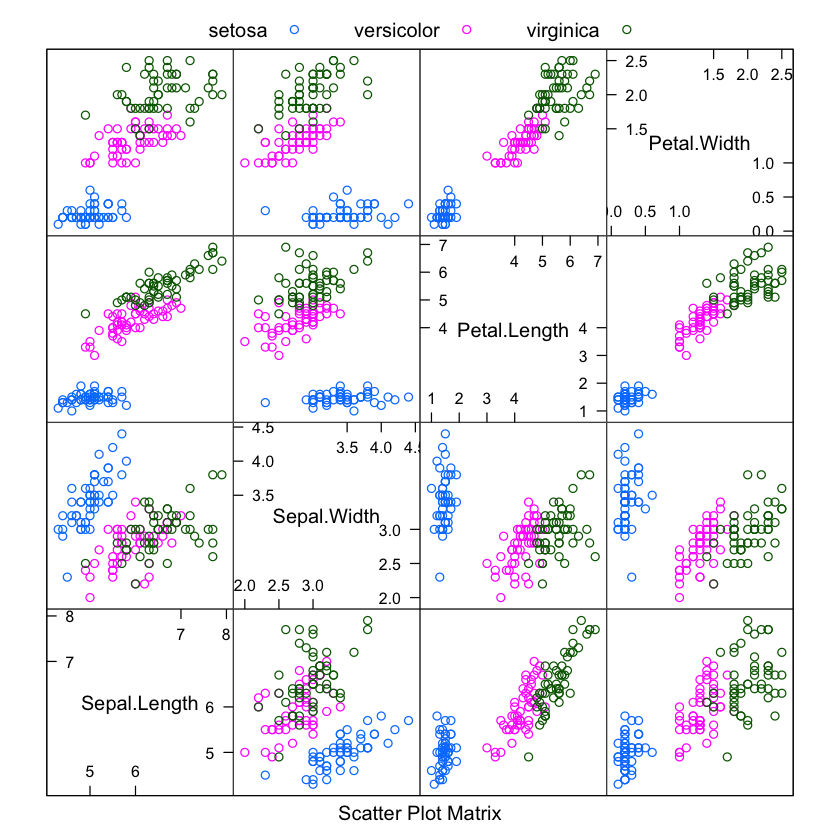

In [7]:
featurePlot(x=indata[, 1:4], 
                        y= indata$Species, 
                        plot="pairs",
                        ## Add a key at the top
                        auto.key = list(columns=3))

One can do the same plot but adding an ellipse to cluster the events.

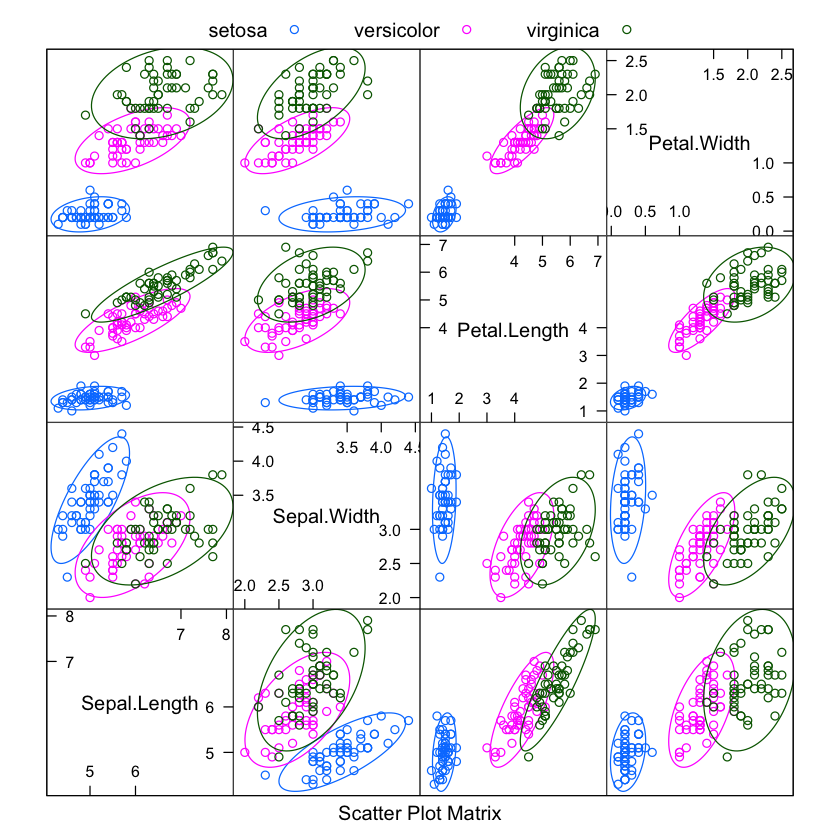

In [8]:
featurePlot(x=indata[, 1:4], 
                              y= indata$Species, 
                              plot="ellipse",
                              ## Add a key at the top
                              auto.key = list(columns=3))


Do density plots



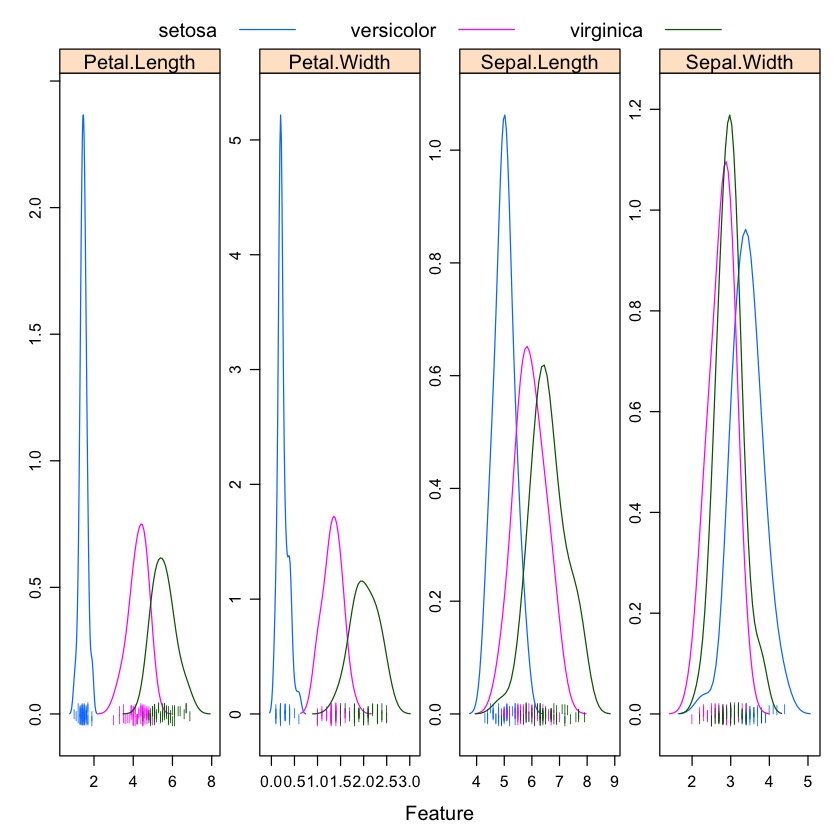

In [9]:
featurePlot(x=indata[, 1:4], 
                                y= indata$Species, 
                                plot="density",
                                ## Pass in options to xyplot() to 
                                ## make it prettier
                                scales = list(x = list(relation="free"),
                                              y = list(relation="free")),
                                adjust = 1.5,
                                pch = "|",
                                layout = c(4, 1),
                                auto.key = list(columns = 3))

.. box plots...


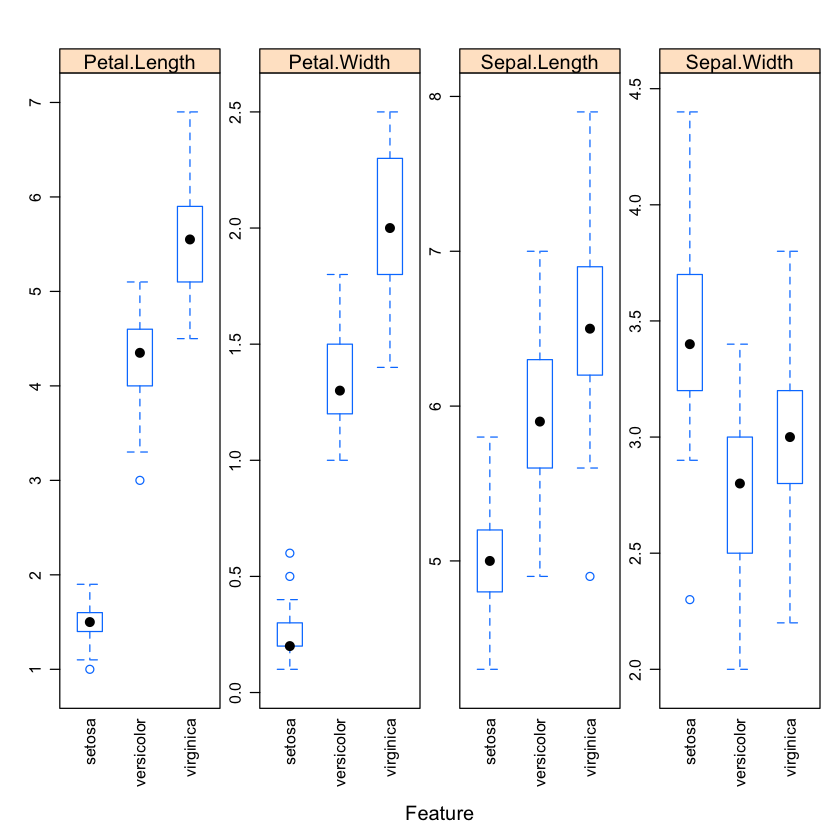

In [10]:
featurePlot(x = iris[, 1:4],
                             y = iris$Species,
                             plot = "box",
                             ## Pass in options to bwplot() 
                             scales = list(y = list(relation="free"),
                                           x = list(rot = 90)),
                             layout = c(4,1 ),
                             auto.key = list(columns = 2))

### 3. Set the seed

In [11]:
set.seed(1987)


### 4. Split the dataset into training and testing sets

To perform the split, I will sample out of a linear space of continuous integers baring the size nrows(indata) a percentage of the total; let's say 60%. These random 90 integers will be the row indices that I will use in my training sample. The rest are for my testing.

Let's skip CV and validation samples for the moment...

In [12]:
train_indx <- sample(nrow(indata), floor(nrow(indata)*0.6))  # sample(nrow(indata) = 150
                                                             # floor(nrow(indata)*0.6 = 90

In [13]:
train_indx

[1]  15 120  90  57 146 144  56  34  85  49 142 104 100  25  41  64  19  88 108
[20]  50  40   2  70  71  63  37   6  27  83  73  86  24  53  52  47  38 136  89
[39]  32 106  76  77  39 117  43  17 137  54 133  48  62 125 111  26 124  30 105
[58] 134   3  94  68  99   1 107  60  22 132  59  82 113   7 114 141  74  91  96
[77]  18   4 112 138   8  29 130  66   9  79 149  21  84 122

In [14]:
train_sample <- indata[train_indx, ]

In [16]:
test_sample <- indata[-train_indx, ]

For example my test sample now holds...


In [17]:
test_sample

Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
5            5.0         3.6          1.4         0.2     setosa
10           4.9         3.1          1.5         0.1     setosa
11           5.4         3.7          1.5         0.2     setosa
12           4.8         3.4          1.6         0.2     setosa
13           4.8         3.0          1.4         0.1     setosa
14           4.3         3.0          1.1         0.1     setosa
16           5.7         4.4          1.5         0.4     setosa
20           5.1         3.8          1.5         0.3     setosa
23           4.6         3.6          1.0         0.2     setosa
28           5.2         3.5          1.5         0.2     setosa
31           4.8         3.1          1.6         0.2     setosa
33           5.2         4.1          1.5         0.1     setosa
35           4.9         3.1          1.5         0.2     setosa
36           5.0         3.2          1.2         0.2     setosa
42           4.5         2.3          1.3         0.3     setosa
44           5.0         3.5          1.6         0.6     setosa
45           5.1         3.8          1.9         0.4     setosa
46           4.8         3.0          1.4         0.3     setosa
51           7.0         3.2          4.7         1.4 versicolor
55           6.5         2.8          4.6         1.5 versicolor
58           4.9         2.4          3.3         1.0 versicolor
61           5.0         2.0          3.5         1.0 versicolor
65           5.6         2.9          3.6         1.3 versicolor
67           5.6         3.0          4.5         1.5 versicolor
69           6.2         2.2          4.5         1.5 versicolor
72           6.1         2.8          4.0         1.3 versicolor
75           6.4         2.9          4.3         1.3 versicolor
78           6.7         3.0          5.0         1.7 versicolor
80           5.7         2.6          3.5         1.0 versicolor
81           5.5         2.4          3.8         1.1 versicolor
87           6.7         3.1          4.7         1.5 versicolor
92           6.1         3.0          4.6         1.4 versicolor
93           5.8         2.6          4.0         1.2 versicolor
95           5.6         2.7          4.2         1.3 versicolor
97           5.7         2.9          4.2         1.3 versicolor
98           6.2         2.9          4.3         1.3 versicolor
101          6.3         3.3          6.0         2.5  virginica
102          5.8         2.7          5.1         1.9  virginica
103          7.1         3.0          5.9         2.1  virginica
109          6.7         2.5          5.8         1.8  virginica
110          7.2         3.6          6.1         2.5  virginica
115          5.8         2.8          5.1         2.4  virginica
116          6.4         3.2          5.3         2.3  virginica
118          7.7         3.8          6.7         2.2  virginica
119          7.7         2.6          6.9         2.3  virginica
121          6.9         3.2          5.7         2.3  virginica
123          7.7         2.8          6.7         2.0  virginica
126          7.2         3.2          6.0         1.8  virginica
127          6.2         2.8          4.8         1.8  virginica
128          6.1         3.0          4.9         1.8  virginica
129          6.4         2.8          5.6         2.1  virginica
131          7.4         2.8          6.1         1.9  virginica
135          6.1         2.6          5.6         1.4  virginica
139          6.0         3.0          4.8         1.8  virginica
140          6.9         3.1          5.4         2.1  virginica
143          5.8         2.7          5.1         1.9  virginica
145          6.7         3.3          5.7         2.5  virginica
147          6.3         2.5          5.0         1.9  virginica
148          6.5         3.0          5.2         2.0  virginica
150          5.9         3.0          5.1         1.8  virginica

----

### 5. Create the formula to train the model 

Now to train the model we'll use the `train` function.
This needs a formula object specifying which variable is the Y and which are the X's in the form of ** Y ~ X1 + X2 + ...**

Also, the string with the name of the model is needed to be specified. To find out which model names are included in the caret package simply to :

In [18]:
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "amdai"               "ANFIS"               "avNNet"             
  [7] "awnb"                "awtan"               "bag"                
 [10] "bagEarth"            "bagEarthGCV"         "bagFDA"             
 [13] "bagFDAGCV"           "bartMachine"         "bayesglm"           
 [16] "bdk"                 "binda"               "blackboost"         
 [19] "Boruta"              "brnn"                "BstLm"              
 [22] "bstSm"               "bstTree"             "C5.0"               
 [25] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [28] "cforest"             "chaid"               "CSimca"             
 [31] "ctree"               "ctree2"              "cubist"             
 [34] "DENFIS"              "dnn"                 "dwdLinear"          
 [37] "dwdPoly"             "dwdRadial"           "earth"              
 [40] "elm"                 "enet"                "enpls.fs"           
 [43] "enpls"               "evtree"              "extraTrees"         
 [46] "fda"                 "FH.GBML"             "FIR.DM"             
 [49] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [52] "FS.HGD"              "gam"                 "gamboost"           
 [55] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [58] "gaussprPoly"         "gaussprRadial"       "gbm"                
 [61] "gcvEarth"            "GFS.FR.MOGUL"        "GFS.GCCL"           
 [64] "GFS.LT.RS"           "GFS.THRIFT"          "glm"                
 [67] "glmboost"            "glmnet"              "glmStepAIC"         
 [70] "gpls"                "hda"                 "hdda"               
 [73] "HYFIS"               "icr"                 "J48"                
 [76] "JRip"                "kernelpls"           "kknn"               
 [79] "knn"                 "krlsPoly"            "krlsRadial"         
 [82] "lars"                "lars2"               "lasso"              
 [85] "lda"                 "lda2"                "leapBackward"       
 [88] "leapForward"         "leapSeq"             "Linda"              
 [91] "lm"                  "lmStepAIC"           "LMT"                
 [94] "loclda"              "logicBag"            "LogitBoost"         
 [97] "logreg"              "lssvmLinear"         "lssvmPoly"          
[100] "lssvmRadial"         "lvq"                 "M5"                 
[103] "M5Rules"             "mda"                 "Mlda"               
[106] "mlp"                 "mlpWeightDecay"      "multinom"           
[109] "nb"                  "nbDiscrete"          "nbSearch"           
[112] "neuralnet"           "nnet"                "nnls"               
[115] "nodeHarvest"         "oblique.tree"        "OneR"               
[118] "ORFlog"              "ORFpls"              "ORFridge"           
[121] "ORFsvm"              "ownn"                "pam"                
[124] "parRF"               "PART"                "partDSA"            
[127] "pcaNNet"             "pcr"                 "pda"                
[130] "pda2"                "penalized"           "PenalizedLDA"       
[133] "plr"                 "pls"                 "plsRglm"            
[136] "polr"                "ppr"                 "protoclass"         
[139] "pythonKnnReg"        "qda"                 "QdaCov"             
[142] "qrf"                 "qrnn"                "ranger"             
[145] "rbf"                 "rbfDDA"              "rda"                
[148] "relaxo"              "rf"                  "rFerns"             
[151] "RFlda"               "rfRules"             "ridge"              
[154] "rknn"                "rknnBel"             "rlm"                
[157] "rmda"                "rocc"                "rotationForest"     
[160] "rotationForestCp"    "rpart"               "rpart2"             
[163] "rpartCost"           "rqlasso"             "rqnc"               
[166] "RRF"                 "RRFglobal"   


So first let's create the formula

In [19]:
formula <- as.formula(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width)

And train the model by

In [20]:
tr <- train(formula, train_sample, method="rpart") #, 
           # minsplit=2, minbucket=1, cp=0.001, maxdepth=8)

Loading required package: rpart


Additional settings/parameters of the model can be set in the `train` function. For example the `minsplit` in the `rpart` model is the minimum number of observations a node must have to be splitted. Similarly, `minbucket` is the minimum number of observations the *leaf* node must have, `cp` is the complexity parameter (any split that does not decrease the overall lack of fit by a factor of `cp` is not attempted). Finally, `maxdepth` is the size of the tree (Root node being 0).

**N.B.** The complexity parameter is used to control the size of the decision tree and to select the optimal tree size. This is useful if you want to look at the values of CP for various tree sizes. The default value is 0.01.

Printing out the `tr` object gives us some information about the model

In [29]:
print(tr)

CART 

90 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 90, 90, 90, 90, 90, 90, ... 
Resampling results across tuning parameters:

  cp         Accuracy   Kappa      Accuracy SD  Kappa SD  
  0.0000000  0.9290799  0.8917610  0.02847877   0.04353444
  0.3793103  0.8589198  0.7850328  0.11650106   0.17618093
  0.5517241  0.4458745  0.1901532  0.17222404   0.24096407

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was cp = 0. 


In [27]:
summary(tr)

Call:
rpart(formula = .outcome ~ ., data = list(Sepal.Length = c(5.8, 
6, 5.5, 6.3, 6.7, 6.8, 5.7, 5.5, 5.4, 5.3, 6.9, 6.3, 5.7, 4.8, 
5, 6.1, 5.7, 6.3, 7.3, 5, 5.1, 4.9, 5.6, 5.9, 6, 5.5, 5.4, 5, 
5.8, 6.3, 6, 5.1, 6.9, 6.4, 5.1, 4.9, 7.7, 5.6, 5.4, 7.6, 6.6, 
6.8, 4.4, 6.5, 4.4, 5.4, 6.3, 5.5, 6.4, 4.6, 5.9, 6.7, 6.5, 5, 
6.3, 4.7, 6.5, 6.3, 4.7, 5, 5.8, 5.1, 5.1, 4.9, 5.2, 5.1, 7.9, 
6.6, 5.5, 6.8, 4.6, 5.7, 6.7, 6.1, 5.5, 5.7, 5.1, 4.6, 6.4, 6.4, 
5, 5.2, 7.2, 6.7, 4.4, 6, 6.2, 5.4, 6, 5.6), Sepal.Width = c(4, 
2.2, 2.5, 3.3, 3, 3.2, 2.8, 4.2, 3, 3.7, 3.1, 2.9, 2.8, 3.4, 
3.5, 2.9, 3.8, 2.3, 2.9, 3.3, 3.4, 3, 2.5, 3.2, 2.2, 3.5, 3.9, 
3.4, 2.7, 2.5, 3.4, 3.3, 3.1, 3.2, 3.8, 3.6, 3, 3, 3.4, 3, 3, 
2.8, 3, 3, 3.2, 3.9, 3.4, 2.3, 2.8, 3.2, 3, 3.3, 3.2, 3, 2.7, 
3.2, 3, 2.8, 3.2, 2.3, 2.7, 2.5, 3.5, 2.5, 2.7, 3.7, 3.8, 2.9, 
2.4, 3, 3.4, 2.5, 3.1, 2.8, 2.6, 3, 3.5, 3.1, 2.7, 3.1, 3.4, 
3.4, 3, 3.1, 2.9, 2.9, 3.4, 3.4, 2.7, 2.8), Petal.Length = c(1.2, 
5, 4, 4.7, 5.2, 5.9, 4.5, 1.4, 4.5

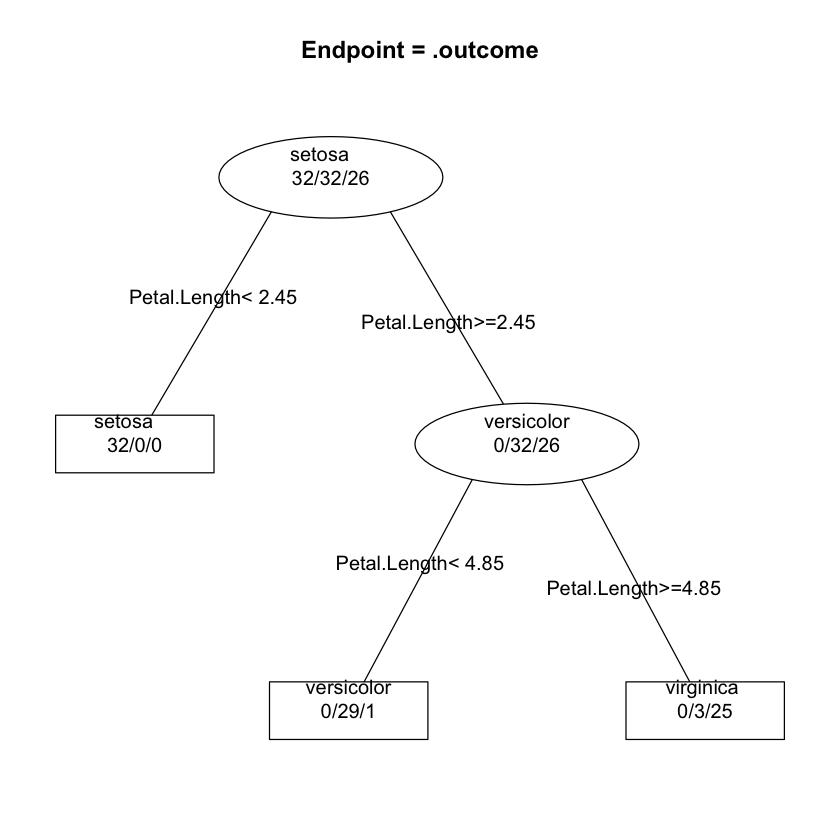

In [26]:
post(tr$finalModel,file='')